<a href="https://colab.research.google.com/github/claireshort4/NetPyNE-course/blob/main/Connections_Tutorial_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Networks tutorial 1

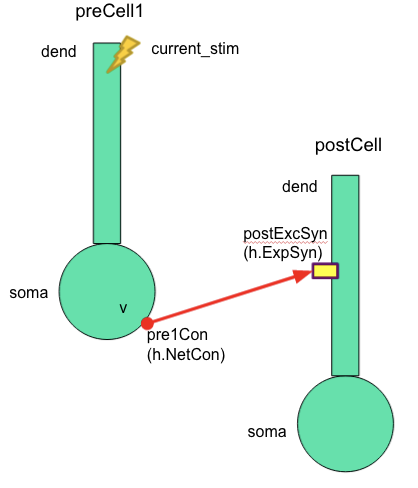

#Installing and Importing the Neuron simulator

In [1]:
!pip install --upgrade neuron

from neuron import h, gui
from matplotlib import pyplot as plt

     |████████████████████████████████| 12.6MB 236kB/s 


# Defining a Class structure to create a Cell model 

In [2]:
class HHCell: 
    """Two-section cell: A soma with active channels and
    a dendrite with passive properties."""
    def __init__(self):
        self.create_sections()
        self.build_topology()
        self.define_geometry()
        self.define_biophysics()

    def create_sections(self):
        self.soma = h.Section(name='soma')
        self.dend = h.Section(name='dend')
        
    def build_topology(self):
        self.dend.connect(self.soma(1))

    def define_geometry(self):
        self.soma.L = 12.6157
        self.soma.diam = 12.6157 # Makes a soma of 500 microns squared.
        self.dend.L = 180 # microns
        self.dend.diam = 1 # microns
        self.dend.nseg = 11

    def define_biophysics(self):
        # Set membrane properties
        for sec in [self.soma, self.dend]:
            sec.Ra = 100    # Axial resistance in Ohm * cm
            sec.cm = 1      # Membrane capacitance in micro Farads / cm^2

        # Insert active Hodgkin-Huxley current in the soma
        self.soma.insert(h.hh)
        self.soma.gnabar_hh = 0.12  # Sodium conductance in S/cm2
        self.soma.gkbar_hh = 0.036  # Potassium conductance in S/cm2
        self.soma.gl_hh = 0.0003    # Leak conductance in S/cm2
        self.soma.el_hh = -54.3     # Reversal potential in mV

        # Insert passive current in the dendrite
        self.dend.insert(h.pas)
        self.dend.g_pas = 0.001  # Passive conductance in S/cm2
        self.dend.e_pas = -65    # Leak reversal potential mV

    def add_current_stim(self, delay):
        self.stim = h.IClamp(self.dend(1.0))
        self.stim.amp = 0.1  # input current in nA
        self.stim.delay = 20  # turn on after this time in ms
        self.stim.dur = 3 # duration of 1 ms

    def record_voltage(self):
        self.t_vec = h.Vector()
        self.v_vec_soma = h.Vector()
        self.v_vec_dend = h.Vector()
        self.v_vec_soma.record(self.soma(1.0)._ref_v) # change recoding pos
        self.v_vec_dend.record(self.dend(1.0)._ref_v)
        self.t_vec.record(h._ref_t)

    def plot_voltage(self):
        plt.figure(figsize=(8,4)) # Default figsize is (8,6)
        plt.plot(self.t_vec, self.v_vec_soma, 'b', label='soma')
        plt.plot(self.t_vec, self.v_vec_dend, 'r', label='dend')
        plt.xlabel('time (ms)')
        plt.ylabel('mV')
        plt.legend()
        plt.show()

**1) Create a cell preCell1 of the class HHCell**

**2) Adapt the add_current_stim method to accept delay as an input argument, and add a current stimulation to preCell1 at 20 ms:**

**3) Record the voltage of the cell**

In [3]:
preCell1 = HHCell()
preCell1.add_current_stim(20)
preCell1.record_voltage()

**4) Add a postCell of class HHCell , and set up recording of voltage (NO current stimulation).**

In [4]:
postCell = HHCell()
postCell.record_voltage()

**5) Add an excitatory synaptic receptor called postSyn1 at the dendrite of postCell, with reversal potential of 0 mV and delay of 2 ms:**

In [10]:
postSyn1 = h.ExpSyn(postCell.dend(0.5)) #what is the 0.5 from?
postSyn1.e = -90 #default is millivolts, original = 0
postSyn1.tau = 2

**6) Add a connection between the preCell1 soma and the postCell dendrite with weight of 0.002 and delay of 1 ms**


In [11]:
pre1Con = h.NetCon(preCell1.soma(0.5)._ref_v, postSyn1, sec = preCell1.soma)
pre1Con.weight[0] = 0.002
pre1Con.delay = 1

7) Fix the voltage plot axis between -80 and 20 mV using the `pyplot.ylim(min,max)` method:

(-80.0, 20.0)

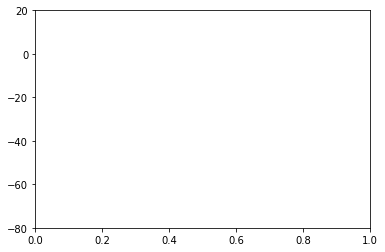

In [12]:
plt.ylim(-80,20)

**8) Run simulation for 60 ms and plot the preCell1 and postCell voltage**

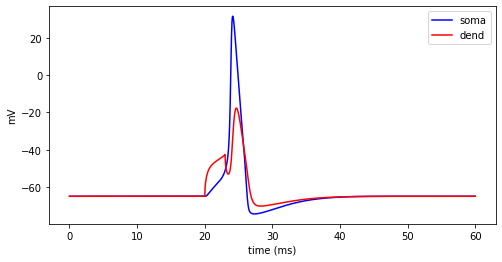

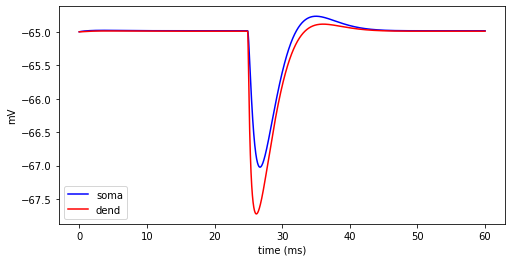

In [13]:
h.finitialize(-65) #what is -65
h.continuerun(60)

preCell1.plot_voltage()
postCell.plot_voltage()


**9) Play with the ExpSyn and Netcon parameters to get:
a) Small EPSP
b) EPSP that leads to action potential
c) IPSP**